# Comprehensive Analysis of our Exploitation+Exploration strategy

1. Comparison between 90%+10% hybrid strategies and 100% DATE
    - DATE(90%)+random(10%)
    - DATE(90%)+BADGE(10%)
    - DATE(90%)+bATE(10%)
    - DATE(90%)+enhanced_bATE(10%)
    - DATE(100%)
    

## 1. Comparison between Hybrid Strategies (by changing Exploration part) and DATE only

In [12]:
import numpy as np
import pandas as pd
import glob 
import csv
import traceback
import datetime
import os
pd.options.display.max_columns=50

In [13]:
results = glob.glob('./results/performances/fld4-result-*')   # quick- or www21- or fld-
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

### Collecting Result Files: Results of Individual Experiments

In [14]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

full_results = defaultdict(list)

# Retrieving results
num_logs = len([i for i in list1 if i > 1000])
count= 0
for i in range(1,num_logs+1):
    try:
        df = pd.read_csv(list2[-i])
        var = 'norm-revenue'
        rolling_mean7 = df[var].rolling(window=7).mean()
        rolling_mean14 = df[var].rolling(window=4).mean()
        filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
        info = ','.join(list(df[['data', 'sampling', 'subsamplings']].iloc[0]))
        full_results[info].append(rolling_mean14)
        count += 1
        
# Draw individual figures
#         plt.figure()
#         plt.title(info+','+filename)
#         plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
#         plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
#         plt.plot(df['numWeek'], rolling_mean14, color='blue', label='MA (14 weeks)')
#         plt.legend(loc='upper left')
#         plt.ylabel(var)
#         plt.xlabel('numWeeks')
#         plt.show()
    except:
        print('loading error:', list2[-i])
        continue
print(count)
#     plt.close()

100


### Synthetic data Simulation Results

In [6]:
full_results.keys()

dict_keys(['real-t,hybrid,DATE/enhanced_bATE', 'real-t,hybrid,DATE/random', 'real-t,hybrid,DATE/badge', 'real-t,hybrid,DATE/bATE', 'real-n,hybrid,DATE/enhanced_bATE', 'real-n,hybrid,DATE/random', 'real-t,DATE,-', 'real-n,hybrid,DATE/badge', 'real-n,hybrid,DATE/bATE', 'real-n,DATE,-', 'real-m,hybrid,DATE/enhanced_bATE', 'real-m,hybrid,DATE/random', 'real-m,hybrid,DATE/badge', 'real-m,hybrid,DATE/bATE', 'real-m,DATE,-', 'synthetic,hybrid,DATE/enhanced_bATE', 'synthetic,hybrid,DATE/random', 'synthetic,hybrid,DATE/badge', 'synthetic,hybrid,DATE/bATE', 'synthetic,DATE,-'])

The number of trials for each setting (Results are averaged):
synthetic,hybrid,DATE/enhanced_bATE 5 0.277
synthetic,hybrid,DATE/random 5 0.275
synthetic,hybrid,DATE/badge 5 0.272
synthetic,hybrid,DATE/bATE 5 0.2776
synthetic,DATE,- 5 0.2923


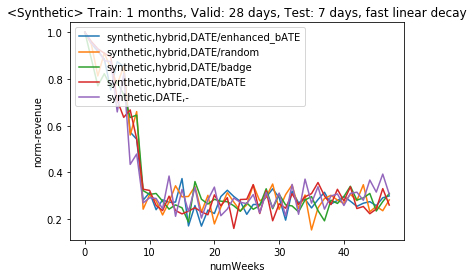

In [7]:
plt.figure()
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))

result_one_dataset = [key for key in full_results.keys() if 'synthetic' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-28:]), 4))
    plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Synthetic> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left')
plt.ylabel(var)
plt.xlabel('numWeeks')
plt.show()
plt.close()

### Mdata Simulation Results

In [8]:
full_results.keys()

dict_keys(['real-t,hybrid,DATE/enhanced_bATE', 'real-t,hybrid,DATE/random', 'real-t,hybrid,DATE/badge', 'real-t,hybrid,DATE/bATE', 'real-n,hybrid,DATE/enhanced_bATE', 'real-n,hybrid,DATE/random', 'real-t,DATE,-', 'real-n,hybrid,DATE/badge', 'real-n,hybrid,DATE/bATE', 'real-n,DATE,-', 'real-m,hybrid,DATE/enhanced_bATE', 'real-m,hybrid,DATE/random', 'real-m,hybrid,DATE/badge', 'real-m,hybrid,DATE/bATE', 'real-m,DATE,-', 'synthetic,hybrid,DATE/enhanced_bATE', 'synthetic,hybrid,DATE/random', 'synthetic,hybrid,DATE/badge', 'synthetic,hybrid,DATE/bATE', 'synthetic,DATE,-'])

The number of trials for each setting (Results are averaged):
real-m,hybrid,DATE/enhanced_bATE 5 0.5533
real-m,hybrid,DATE/random 5 0.5847
real-m,hybrid,DATE/badge 5 0.5764
real-m,hybrid,DATE/bATE 5 0.5677
real-m,DATE,- 5 0.5726


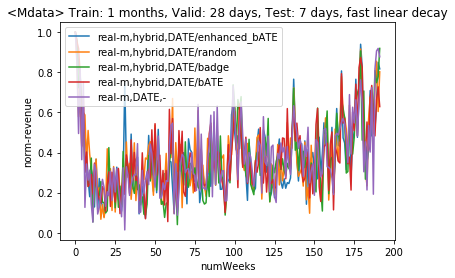

In [9]:
plt.figure()
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))

result_one_dataset = [key for key in full_results.keys() if 'real-m' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-28:]), 4))
    plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Mdata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left')
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.4, 0.6)
plt.show()
plt.close()

### Tdata Simulation Results

The number of trials for each setting (Results are averaged):
real-t,hybrid,DATE/enhanced_bATE 5 0.6233
real-t,hybrid,DATE/random 5 0.6033
real-t,hybrid,DATE/badge 5 0.6217
real-t,hybrid,DATE/bATE 5 0.6046
real-t,DATE,- 5 0.1597


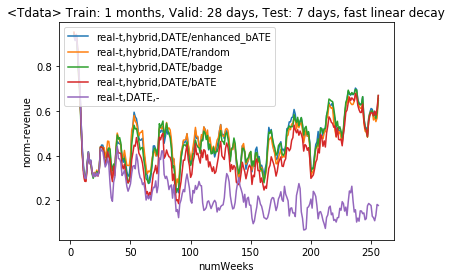

In [16]:
plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-t' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    print(key, len(full_results[key]), round(np.mean(avg_result[-28:]), 4))
    plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Tdata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left')
plt.ylabel(var)
plt.xlabel('numWeeks')

plt.show()
plt.close()

The number of trials for each setting (Results are averaged):


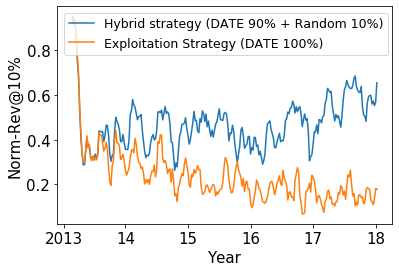

In [44]:
plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-t' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    if key == 'real-t,hybrid,DATE/random':
        plt.plot(avg_result.index, avg_result, label='Hybrid strategy (DATE 90% + Random 10%)')
    if key == 'real-t,DATE,-':
        plt.plot(avg_result.index, avg_result, label='Exploitation Strategy (DATE 100%)')
    
# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

# plt.title('<Tdata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left', fontsize=12.5)
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-4,47,99,151,203,255], labels=['2013', 14, 15, 16,17, 18], fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)

plt.show()
plt.close()


### Ndata Simulation Results

The number of trials for each setting (Results are averaged):
real-n,hybrid,DATE/enhanced_bATE 5 0.8667
real-n,hybrid,DATE/random 5 0.8626
real-n,hybrid,DATE/badge 5 0.8714
real-n,hybrid,DATE/bATE 5 0.8682
real-n,DATE,- 5 0.8571


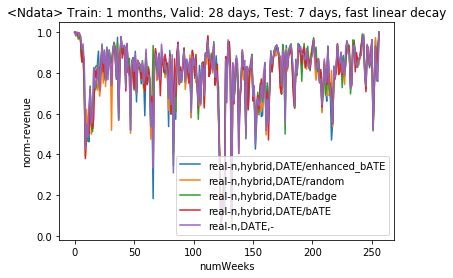

In [11]:
plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-n' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    print(key, len(full_results[key]), round(np.mean(avg_result[-28:]), 4))
    plt.plot(avg_result.index, avg_result, label=key)
    
plt.title('<Ndata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='lower right')
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.75, 0.85)
plt.show()
plt.close()

# Novel Fraud Analysis
We show that hybrid model with exploration performs better for trades from new HS6 and new ID

In [9]:
results = glob.glob('./results/performances/fld5-result-*')   # quick- or www21- or fld-
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

In [10]:
# Retrieving results
num_logs = len([i for i in list1 if i > 1000])
count= 0
summary = []
for i in range(1,num_logs+1):
    rslt = pd.read_csv(list2[-i])
    dic = rslt[['runID','data','sampling','subsamplings','numWeek','current_inspection_rate','test_start','test_end']].iloc[len(rslt)-1].to_dict()
    run_id = round(dic['runID'], 3)
    data = dic['data']
    subsamplings = dic['subsamplings'].replace('/','+')
    strategy = dic['sampling']
    cir = dic['current_inspection_rate']
    summary.append(dic)
summary = pd.DataFrame(summary)

In [11]:
# Index will be used later
summary[summary.data == 'real-t']

,runID,data,sampling,subsamplings,numWeek,current_inspection_rate,test_start,test_end
0,1.602872e+09,real-t,hybrid,DATE/bATE,257,10.0,19-12-29,20-01-05
1,1.602873e+09,real-t,hybrid,DATE/bATE,257,10.0,19-12-29,20-01-05
2,1.602996e+09,real-t,hybrid,DATE/enhanced_bATE,55,10.0,16-02-14,16-02-21
3,1.602996e+09,real-t,hybrid,DATE/enhanced_bATE,53,10.0,16-01-31,16-02-07
4,1.602996e+09,real-t,hybrid,DATE/enhanced_bATE,52,10.0,16-01-24,16-01-31


In [17]:
def firstCheck(df):
    """ Sorting and indexing necessary for data preparation """
    df = df.dropna(subset=["illicit"])
    df = df.sort_values("sgd.date")
    df = df.reset_index(drop=True)
    return df

dfn = firstCheck(pd.read_csv('data/ndata.csv'))
dft = firstCheck(pd.read_csv('data/tdata.csv'))
dfm = firstCheck(pd.read_csv('data/mdata.csv'))
dfs = firstCheck(pd.read_csv('data/synthetic-imports-declarations.csv'))

In [200]:
### Previous code
def performanceOnNovel(exp_a):
    run_id = round(exp_a['runID'], 3)
    strategy = exp_a['sampling']
    subsamplings = exp_a['subsamplings'].replace('/','+')
    cir = exp_a['current_inspection_rate']
    week = exp_a['numWeek']
    measure_start = 0
    measure_end = week
    novelty = {}
    old_IID = set()

   
    for week in range(measure_start,measure_end):
        filename = glob.glob(f'results/query_indices/{run_id}-{strategy}-{subsamplings}-*-scratch-week-{week}.csv')[0]
        with open(filename, "r") as f:
            reader = csv.reader(f, delimiter=",")
            expid = next(reader)[1]
            dataset = next(reader)[1]
            episode = next(reader)[1]
            start_day = next(reader)[1]
            end_day = next(reader)[1]

            start_day = datetime.date(int(start_day[:4]), int(start_day[5:7]), int(start_day[8:10])).strftime('%y-%m-%d')
            end_day = datetime.date(int(end_day[:4]), int(end_day[5:7]), int(end_day[8:10])).strftime('%y-%m-%d')

            if week == measure_start:
                if dataset == 'real-m':
                    df = dfm
                elif dataset == 'synthetic':
                    df = dfs
                elif dataset == 'real-n':
                    df = dfn
                elif dataset == 'real-t':
                    df = dft
                
            alldata = df[(df['sgd.date'] < end_day) & (df['sgd.date'] >= start_day)].loc[:, ['illicit', 'revenue', 'importer.id']]
            alldata = alldata[~alldata['importer.id'].isin(old_IID)]

            if alldata.empty:
                continue
            
            all_indices = []
            all_samps = ''
            
            while True:
                try:
                    indices = next(reader)
                    samp = indices[0]
                    indices = indices[1:]
                    indices = list(map(int, indices))
                    all_indices.extend(indices)
                    all_samps = all_samps + (samp + '-')
                except StopIteration:
                    break
            
            
            if week == measure_start:
                novelty[f'{all_samps}-pre'] = []
                novelty[f'{all_samps}-rec'] = []
                novelty[f'{all_samps}-rev'] = []

            chosen = df.iloc[all_indices].loc[:, ['illicit', 'revenue', 'importer.id']]
            chosen = chosen[~chosen['importer.id'].isin(old_IID)]

            # Recall and revenue
            try:
                pre = sum(chosen['illicit'])/chosen['illicit'].count()
                rec = sum(chosen['illicit'])/sum(alldata['illicit'])
                rev = sum(chosen['revenue'])/sum(alldata['revenue'])
            except:
                continue
                
            novelty[f'{all_samps}-pre'].append(pre)
            novelty[f'{all_samps}-rec'].append(rec)
            novelty[f'{all_samps}-rev'].append(rev)

            old_IID = old_IID.union(set(alldata['importer.id'].values))
            print(f'# indices = {len(all_indices)}, # old_ID: {len(old_IID)}, # new trades: {len(chosen)}')
    return pd.DataFrame(novelty)

#### Nigeria

In [202]:
exp6, exp7, exp8, exp9, exp10 = 18, 23, 32, 38, 44
rival6 = performanceOnNovel(summary.loc[exp6])
print('!!!!!!!')
rival7 = performanceOnNovel(summary.loc[exp7])
print('!!!!!!!')
rival8 = performanceOnNovel(summary.loc[exp8])
print('!!!!!!!')
rival9 = performanceOnNovel(summary.loc[exp9])
print('!!!!!!!')
rival10 = performanceOnNovel(summary.loc[exp10])

# indices = 7037, # old_ID: 3125, # new trades: 7037
# indices = 8219, # old_ID: 6130, # new trades: 4540
# indices = 6273, # old_ID: 8365, # new trades: 2823
# indices = 5303, # old_ID: 10165, # new trades: 2090
# indices = 5316, # old_ID: 12275, # new trades: 2163
# indices = 4548, # old_ID: 14127, # new trades: 1388
# indices = 3316, # old_ID: 15720, # new trades: 986
# indices = 3193, # old_ID: 17678, # new trades: 875
# indices = 1219, # old_ID: 18408, # new trades: 591
# indices = 844, # old_ID: 19409, # new trades: 209
# indices = 926, # old_ID: 20690, # new trades: 220
# indices = 956, # old_ID: 23039, # new trades: 178
# indices = 737, # old_ID: 24641, # new trades: 74
# indices = 1017, # old_ID: 26778, # new trades: 135
# indices = 882, # old_ID: 28530, # new trades: 120
# indices = 946, # old_ID: 30377, # new trades: 114
# indices = 843, # old_ID: 32079, # new trades: 125
# indices = 1020, # old_ID: 34015, # new trades: 105
# indices = 1037, # old_ID: 36012, # new trades: 13

# indices = 502, # old_ID: 130031, # new trades: 11
# indices = 534, # old_ID: 130293, # new trades: 34
# indices = 636, # old_ID: 130571, # new trades: 30
# indices = 522, # old_ID: 130754, # new trades: 23
# indices = 553, # old_ID: 131004, # new trades: 34
# indices = 666, # old_ID: 131345, # new trades: 30
# indices = 479, # old_ID: 131549, # new trades: 13
# indices = 523, # old_ID: 131775, # new trades: 18
# indices = 599, # old_ID: 132013, # new trades: 22
# indices = 544, # old_ID: 132253, # new trades: 16
# indices = 632, # old_ID: 132499, # new trades: 24
# indices = 644, # old_ID: 132802, # new trades: 37
# indices = 562, # old_ID: 133000, # new trades: 14
# indices = 637, # old_ID: 133279, # new trades: 36
# indices = 632, # old_ID: 133576, # new trades: 31
# indices = 662, # old_ID: 133838, # new trades: 38
# indices = 688, # old_ID: 134143, # new trades: 16
# indices = 651, # old_ID: 134452, # new trades: 31
# indices = 673, # old_ID: 134710, # new trades: 26
# indices = 

# indices = 915, # old_ID: 86771, # new trades: 72
# indices = 834, # old_ID: 87279, # new trades: 34
# indices = 1124, # old_ID: 88249, # new trades: 71
# indices = 909, # old_ID: 88857, # new trades: 58
# indices = 700, # old_ID: 89357, # new trades: 41
# indices = 959, # old_ID: 90123, # new trades: 45
# indices = 929, # old_ID: 90693, # new trades: 92
# indices = 839, # old_ID: 91273, # new trades: 63
# indices = 1130, # old_ID: 92110, # new trades: 83
# indices = 769, # old_ID: 92614, # new trades: 50
# indices = 1086, # old_ID: 93496, # new trades: 65
# indices = 863, # old_ID: 94027, # new trades: 43
# indices = 1015, # old_ID: 94734, # new trades: 57
# indices = 926, # old_ID: 95356, # new trades: 50
# indices = 860, # old_ID: 95969, # new trades: 47
# indices = 868, # old_ID: 96588, # new trades: 42
# indices = 871, # old_ID: 97008, # new trades: 40
# indices = 841, # old_ID: 97589, # new trades: 31
# indices = 625, # old_ID: 98049, # new trades: 32
# indices = 882, # old_ID: 

# indices = 467, # old_ID: 148290, # new trades: 24
# indices = 654, # old_ID: 148792, # new trades: 56
# indices = 303, # old_ID: 148949, # new trades: 9
# indices = 501, # old_ID: 149274, # new trades: 25
# indices = 441, # old_ID: 149473, # new trades: 17
# indices = 636, # old_ID: 149818, # new trades: 33
# indices = 644, # old_ID: 150207, # new trades: 42
# indices = 578, # old_ID: 150607, # new trades: 29
# indices = 419, # old_ID: 150801, # new trades: 19
# indices = 567, # old_ID: 151117, # new trades: 32
# indices = 432, # old_ID: 151328, # new trades: 24
# indices = 711, # old_ID: 151683, # new trades: 38
# indices = 371, # old_ID: 151865, # new trades: 27
# indices = 763, # old_ID: 152386, # new trades: 53
# indices = 632, # old_ID: 152756, # new trades: 27
# indices = 473, # old_ID: 153013, # new trades: 29
# indices = 572, # old_ID: 153354, # new trades: 35
# indices = 558, # old_ID: 153756, # new trades: 36
# indices = 679, # old_ID: 154199, # new trades: 55
# indices = 4

# indices = 641, # old_ID: 117246, # new trades: 43
# indices = 743, # old_ID: 117569, # new trades: 28
# indices = 612, # old_ID: 117837, # new trades: 28
# indices = 654, # old_ID: 118153, # new trades: 45
# indices = 684, # old_ID: 118493, # new trades: 68
# indices = 808, # old_ID: 118874, # new trades: 58
# indices = 731, # old_ID: 119156, # new trades: 30
# indices = 704, # old_ID: 119502, # new trades: 64
# indices = 726, # old_ID: 119831, # new trades: 105
# indices = 695, # old_ID: 120218, # new trades: 64
# indices = 522, # old_ID: 120471, # new trades: 24
# indices = 745, # old_ID: 120859, # new trades: 65
# indices = 855, # old_ID: 121299, # new trades: 45
# indices = 760, # old_ID: 121662, # new trades: 63
# indices = 648, # old_ID: 121909, # new trades: 38
# indices = 842, # old_ID: 122364, # new trades: 46
# indices = 678, # old_ID: 122660, # new trades: 37
# indices = 854, # old_ID: 123034, # new trades: 44
# indices = 731, # old_ID: 123287, # new trades: 23
# indices =

KeyboardInterrupt: 

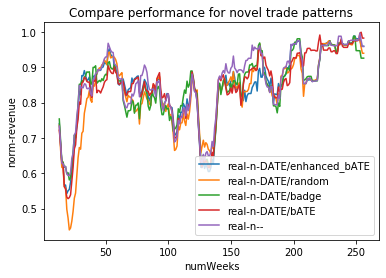

In [198]:
# Compare DATE performances: Between two experiments
plt.figure()
r6 = rival6['DATE-enhanced_bATE--rev'].rolling(window=14).mean()
r7 = rival7['DATE-random--rev'].rolling(window=14).mean()
r8 = rival8['DATE-badge--rev'].rolling(window=14).mean()
r9 = rival9['DATE-bATE--rev'].rolling(window=14).mean()
r10 = rival0['DATE--rev'].rolling(window=14).mean()

plt.plot(r6.index, r6, label=summary.loc[exp6]['data']+'-'+summary.loc[exp6]['subsamplings'])
plt.plot(r7.index, r7, label=summary.loc[exp7]['data']+'-'+summary.loc[exp7]['subsamplings'])
plt.plot(r8.index, r8, label=summary.loc[exp8]['data']+'-'+summary.loc[exp8]['subsamplings'])
plt.plot(r9.index, r9, label=summary.loc[exp9]['data']+'-'+summary.loc[exp9]['subsamplings'])
plt.plot(r10.index, r10, label=summary.loc[exp10]['data']+'-'+summary.loc[exp10]['subsamplings'])
plt.title('Compare performance for novel trade patterns')
plt.legend(loc='lower right')
plt.ylabel(var)
plt.xlabel('numWeeks')
plt.show()
plt.close()

#### Tunisia

In [203]:
exp1, exp2, exp3, exp4, exp5 = 0, 5, 9, 15, 27
rival1 = performanceOnNovel(summary.loc[exp1])
print('!!!!!!!')
rival2 = performanceOnNovel(summary.loc[exp2])
print('!!!!!!!')
rival3 = performanceOnNovel(summary.loc[exp3])
print('!!!!!!!')
rival4 = performanceOnNovel(summary.loc[exp4])
print('!!!!!!!')
rival5 = performanceOnNovel(summary.loc[exp5])

# indices = 16134, # old_ID: 3102, # new trades: 16134
# indices = 14698, # old_ID: 5126, # new trades: 6072
# indices = 13979, # old_ID: 6885, # new trades: 4003
# indices = 12111, # old_ID: 8375, # new trades: 2973
# indices = 11212, # old_ID: 9750, # new trades: 2469
# indices = 9283, # old_ID: 10973, # new trades: 2228
# indices = 6470, # old_ID: 12124, # new trades: 1405
# indices = 5921, # old_ID: 13253, # new trades: 254
# indices = 3381, # old_ID: 14341, # new trades: 134
# indices = 1584, # old_ID: 15199, # new trades: 31
# indices = 1935, # old_ID: 16284, # new trades: 31
# indices = 1872, # old_ID: 17280, # new trades: 302
# indices = 1586, # old_ID: 18100, # new trades: 38
# indices = 2054, # old_ID: 19168, # new trades: 24
# indices = 1963, # old_ID: 20197, # new trades: 13
# indices = 1990, # old_ID: 21230, # new trades: 2
# indices = 1878, # old_ID: 22189, # new trades: 19
# indices = 1806, # old_ID: 23104, # new trades: 48
# indices = 1783, # old_ID: 23998, # new trades

/home/sundong/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in long_scalars


# indices = 1759, # old_ID: 46563, # new trades: 0
# indices = 1847, # old_ID: 47176, # new trades: 0
# indices = 1779, # old_ID: 47733, # new trades: 5
# indices = 1957, # old_ID: 48289, # new trades: 1
# indices = 2017, # old_ID: 48859, # new trades: 15
# indices = 2148, # old_ID: 49434, # new trades: 17
# indices = 1866, # old_ID: 49987, # new trades: 11
# indices = 1923, # old_ID: 50570, # new trades: 8
# indices = 1954, # old_ID: 51150, # new trades: 2
# indices = 1864, # old_ID: 51758, # new trades: 19
# indices = 1673, # old_ID: 52254, # new trades: 11
# indices = 1743, # old_ID: 52760, # new trades: 11
# indices = 2114, # old_ID: 53321, # new trades: 9
# indices = 2174, # old_ID: 53945, # new trades: 7
# indices = 1887, # old_ID: 54504, # new trades: 21
# indices = 1300, # old_ID: 54925, # new trades: 6
# indices = 1883, # old_ID: 55472, # new trades: 9
# indices = 2235, # old_ID: 56064, # new trades: 18
# indices = 2081, # old_ID: 56677, # new trades: 7
# indices = 1837, # old

# indices = 944, # old_ID: 116145, # new trades: 7
# indices = 887, # old_ID: 116267, # new trades: 19
# indices = 1057, # old_ID: 116347, # new trades: 32
# indices = 1459, # old_ID: 116526, # new trades: 53
# indices = 1145, # old_ID: 116695, # new trades: 11
# indices = 1428, # old_ID: 116939, # new trades: 27
# indices = 1237, # old_ID: 117062, # new trades: 35
# indices = 1063, # old_ID: 117232, # new trades: 4
# indices = 1145, # old_ID: 117335, # new trades: 30
# indices = 1456, # old_ID: 117496, # new trades: 12
# indices = 887, # old_ID: 117626, # new trades: 18
# indices = 1085, # old_ID: 117720, # new trades: 45
# indices = 961, # old_ID: 117823, # new trades: 7
# indices = 955, # old_ID: 117900, # new trades: 18
# indices = 1051, # old_ID: 118092, # new trades: 30
# indices = 987, # old_ID: 118230, # new trades: 18
# indices = 852, # old_ID: 118341, # new trades: 12
# indices = 506, # old_ID: 118414, # new trades: 2
# indices = 299, # old_ID: 118432, # new trades: 0
# indic

# indices = 1943, # old_ID: 77798, # new trades: 5
# indices = 2120, # old_ID: 78243, # new trades: 14
# indices = 1247, # old_ID: 78612, # new trades: 5
# indices = 1709, # old_ID: 78863, # new trades: 14
# indices = 1851, # old_ID: 79254, # new trades: 45
# indices = 2141, # old_ID: 79787, # new trades: 14
# indices = 2069, # old_ID: 80387, # new trades: 8
# indices = 2009, # old_ID: 80884, # new trades: 9
# indices = 1789, # old_ID: 81307, # new trades: 14
# indices = 1473, # old_ID: 81632, # new trades: 9
# indices = 2013, # old_ID: 82036, # new trades: 11
# indices = 1771, # old_ID: 82508, # new trades: 5
# indices = 1612, # old_ID: 82934, # new trades: 10
# indices = 1538, # old_ID: 83355, # new trades: 11
# indices = 1432, # old_ID: 83624, # new trades: 9
# indices = 1735, # old_ID: 84137, # new trades: 6
# indices = 1135, # old_ID: 84459, # new trades: 12
# indices = 1766, # old_ID: 84926, # new trades: 24
# indices = 1617, # old_ID: 85567, # new trades: 17
# indices = 1549, # 

# indices = 1584, # old_ID: 15199, # new trades: 20
# indices = 1935, # old_ID: 16284, # new trades: 35
# indices = 1872, # old_ID: 17280, # new trades: 107
# indices = 1586, # old_ID: 18100, # new trades: 6
# indices = 2054, # old_ID: 19168, # new trades: 8
# indices = 1963, # old_ID: 20197, # new trades: 26
# indices = 1990, # old_ID: 21230, # new trades: 1
# indices = 1878, # old_ID: 22189, # new trades: 20
# indices = 1806, # old_ID: 23104, # new trades: 43
# indices = 1783, # old_ID: 23998, # new trades: 55
# indices = 1943, # old_ID: 25044, # new trades: 16
# indices = 1856, # old_ID: 26023, # new trades: 9
# indices = 1723, # old_ID: 26941, # new trades: 6
# indices = 1438, # old_ID: 27414, # new trades: 12
# indices = 928, # old_ID: 28014, # new trades: 5
# indices = 1074, # old_ID: 28390, # new trades: 19
# indices = 1272, # old_ID: 28710, # new trades: 4
# indices = 1342, # old_ID: 29798, # new trades: 32
# indices = 1138, # old_ID: 30275, # new trades: 11
# indices = 1787, #

# indices = 1628, # old_ID: 103464, # new trades: 6
# indices = 1981, # old_ID: 103900, # new trades: 40
# indices = 1939, # old_ID: 104208, # new trades: 40
# indices = 1923, # old_ID: 104525, # new trades: 13
# indices = 1865, # old_ID: 104863, # new trades: 26
# indices = 1862, # old_ID: 105195, # new trades: 34
# indices = 1118, # old_ID: 105408, # new trades: 36
# indices = 2174, # old_ID: 105716, # new trades: 5
# indices = 2919, # old_ID: 106076, # new trades: 29
# indices = 2625, # old_ID: 106476, # new trades: 63
# indices = 1786, # old_ID: 106909, # new trades: 10
# indices = 2061, # old_ID: 107420, # new trades: 26
# indices = 1552, # old_ID: 107890, # new trades: 14
# indices = 1639, # old_ID: 108491, # new trades: 13
# indices = 1959, # old_ID: 109178, # new trades: 35
# indices = 1562, # old_ID: 109932, # new trades: 18
# indices = 1056, # old_ID: 110437, # new trades: 15
# indices = 1687, # old_ID: 111185, # new trades: 6
# indices = 1663, # old_ID: 111832, # new trades:

# indices = 1837, # old_ID: 57209, # new trades: 7
# indices = 1810, # old_ID: 57602, # new trades: 24
# indices = 1485, # old_ID: 57967, # new trades: 1
# indices = 1302, # old_ID: 58183, # new trades: 1
# indices = 1772, # old_ID: 58594, # new trades: 8
# indices = 731, # old_ID: 58808, # new trades: 2
# indices = 2041, # old_ID: 59458, # new trades: 3
# indices = 1940, # old_ID: 60231, # new trades: 1
# indices = 1500, # old_ID: 60897, # new trades: 3
# indices = 1815, # old_ID: 61751, # new trades: 4
# indices = 1464, # old_ID: 62576, # new trades: 3
# indices = 1887, # old_ID: 63659, # new trades: 21
# indices = 1643, # old_ID: 64585, # new trades: 3
# indices = 1532, # old_ID: 65458, # new trades: 13
# indices = 1771, # old_ID: 66253, # new trades: 7
# indices = 1206, # old_ID: 66714, # new trades: 9
# indices = 2036, # old_ID: 67410, # new trades: 6
# indices = 1732, # old_ID: 68027, # new trades: 18
# indices = 1586, # old_ID: 68408, # new trades: 10
# indices = 1450, # old_ID:

# indices = 984, # old_ID: 118663, # new trades: 49
# indices = 1027, # old_ID: 118823, # new trades: 51
# indices = 1170, # old_ID: 118992, # new trades: 16
# indices = 1598, # old_ID: 119376, # new trades: 15
# indices = 1822, # old_ID: 119888, # new trades: 93
# indices = 1482, # old_ID: 120318, # new trades: 42
# indices = 1940, # old_ID: 120933, # new trades: 45
# indices = 1672, # old_ID: 121646, # new trades: 89
# indices = 1084, # old_ID: 122107, # new trades: 15
# indices = 1906, # old_ID: 122861, # new trades: 55
# indices = 1336, # old_ID: 123389, # new trades: 28
# indices = 1862, # old_ID: 123980, # new trades: 25
# indices = 1842, # old_ID: 124424, # new trades: 58
# indices = 1788, # old_ID: 124799, # new trades: 20
# indices = 1933, # old_ID: 125195, # new trades: 72
# indices = 1830, # old_ID: 125538, # new trades: 10
# indices = 1676, # old_ID: 125885, # new trades: 28
# indices = 1665, # old_ID: 126196, # new trades: 36
# indices = 1999, # old_ID: 126508, # new trade

# indices = 1758, # old_ID: 87252, # new trades: 1
# indices = 1676, # old_ID: 88042, # new trades: 0
# indices = 1724, # old_ID: 88833, # new trades: 0
# indices = 1577, # old_ID: 89652, # new trades: 0
# indices = 1118, # old_ID: 90258, # new trades: 0
# indices = 1367, # old_ID: 90812, # new trades: 0
# indices = 1717, # old_ID: 91291, # new trades: 0
# indices = 1547, # old_ID: 91807, # new trades: 0
# indices = 1836, # old_ID: 92342, # new trades: 0
# indices = 1681, # old_ID: 92824, # new trades: 0
# indices = 1604, # old_ID: 93112, # new trades: 0
# indices = 1625, # old_ID: 93595, # new trades: 0
# indices = 1796, # old_ID: 94035, # new trades: 0
# indices = 1549, # old_ID: 94439, # new trades: 0
# indices = 1293, # old_ID: 94790, # new trades: 0
# indices = 1743, # old_ID: 95124, # new trades: 0
# indices = 1630, # old_ID: 95575, # new trades: 0
# indices = 860, # old_ID: 95733, # new trades: 0
# indices = 1117, # old_ID: 95946, # new trades: 5
# indices = 1573, # old_ID: 9621

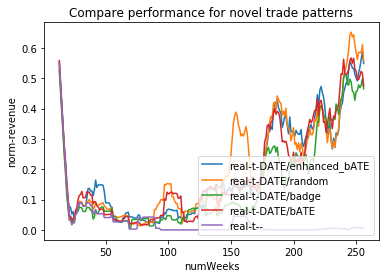

In [204]:
# Compare DATE performances: Between two experiments
plt.figure()
r1 = rival1['DATE-enhanced_bATE--rev'].rolling(window=14).mean()
r2 = rival2['DATE-random--rev'].rolling(window=14).mean()
r3 = rival3['DATE-badge--rev'].rolling(window=14).mean()
r4 = rival4['DATE-bATE--rev'].rolling(window=14).mean()
r5 = rival5['DATE--rev'].rolling(window=14).mean()

plt.plot(r1.index, r1, label=summary.loc[exp1]['data']+'-'+summary.loc[exp1]['subsamplings'])
plt.plot(r2.index, r2, label=summary.loc[exp2]['data']+'-'+summary.loc[exp2]['subsamplings'])
plt.plot(r3.index, r3, label=summary.loc[exp3]['data']+'-'+summary.loc[exp3]['subsamplings'])
plt.plot(r4.index, r4, label=summary.loc[exp4]['data']+'-'+summary.loc[exp4]['subsamplings'])
plt.plot(r5.index, r5, label=summary.loc[exp5]['data']+'-'+summary.loc[exp5]['subsamplings'])
plt.title('Compare performance for novel trade patterns')
plt.legend(loc='lower right')
plt.ylabel(var)
plt.xlabel('numWeeks')
plt.show()
plt.close()

# Comprehensive Analysis of our Exploitation+Exploration strategy

1. Break the overall performance into exploration / exploitation by looking indices
    - Find which experiment identifier to inspect (One ID for one setting)
    - Compare

In [ ]:
def firstCheck(df):
    """ Sorting and indexing necessary for data preparation """
    df = df.dropna(subset=["illicit"])
    df = df.sort_values("sgd.date")
    df = df.reset_index(drop=True)
    return df

dfn = firstCheck(pd.read_csv('data/ndata.csv'))
dft = firstCheck(pd.read_csv('data/tdata.csv'))
dfm = firstCheck(pd.read_csv('data/mdata.csv'))
dfs = firstCheck(pd.read_csv('data/synthetic-imports-declarations.csv'))

In [ ]:
len(dfs['illicit']), len(dfm['illicit']), len(dfn['illicit']), len(dft['illicit'])

In [ ]:
np.mean(dfs['illicit']), np.mean(dfm['illicit']), np.mean(dfn['illicit']), np.mean(dft['illicit'])

In [1]:
results = glob.glob('./results/performances/fld4-result-*')   # quick- or www21- or fld-
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

NameError: name 'glob' is not defined

In [77]:
# Retrieving results
num_logs = len([i for i in list1 if i > 1000])
count= 0
summary = []
for i in range(1,num_logs+1):
    rslt = pd.read_csv(list2[-i])
    dic = rslt[['runID','data','sampling','subsamplings','numWeek','current_inspection_rate','test_start','test_end']].iloc[len(rslt)-1].to_dict()
    run_id = round(dic['runID'], 3)
    data = dic['data']
    subsamplings = dic['subsamplings'].replace('/','+')
    strategy = dic['sampling']
    cir = dic['current_inspection_rate']
    summary.append(dic)
summary = pd.DataFrame(summary)

In [78]:
summary.sort_values(['data', 'sampling', 'subsamplings','numWeek'])

,runID,data,sampling,subsamplings,numWeek,current_inspection_rate,test_start,test_end
68,1.602811e+09,real-m,DATE,-,196,10.0,16-10-28,16-11-04
69,1.602955e+09,real-m,DATE,-,196,10.0,16-10-28,16-11-04
70,1.602761e+09,real-m,DATE,-,196,10.0,16-10-28,16-11-04
71,1.602762e+09,real-m,DATE,-,196,10.0,16-10-28,16-11-04
72,1.602955e+09,real-m,DATE,-,196,10.0,16-10-28,16-11-04
...,...,...,...,...,...,...,...,...
78,1.602761e+09,synthetic,hybrid,DATE/random,48,10.0,13-12-27,14-01-03
79,1.602811e+09,synthetic,hybrid,DATE/random,48,10.0,13-12-27,14-01-03
80,1.602762e+09,synthetic,hybrid,DATE/random,48,10.0,13-12-27,14-01-03
81,1.602956e+09,synthetic,hybrid,DATE/random,48,10.0,13-12-27,14-01-03


In [79]:
# Index will be used later
summary[summary.data == 'real-m']

,runID,data,sampling,subsamplings,numWeek,current_inspection_rate,test_start,test_end
48,1.602871e+09,real-m,hybrid,DATE/enhanced_bATE,196,10.0,16-10-28,16-11-04
49,1.602871e+09,real-m,hybrid,DATE/enhanced_bATE,196,10.0,16-10-28,16-11-04
50,1.602870e+09,real-m,hybrid,DATE/enhanced_bATE,196,10.0,16-10-28,16-11-04
51,1.602870e+09,real-m,hybrid,DATE/enhanced_bATE,196,10.0,16-10-28,16-11-04
52,1.602871e+09,real-m,hybrid,DATE/enhanced_bATE,196,10.0,16-10-28,16-11-04
53,1.602761e+09,real-m,hybrid,DATE/random,196,10.0,16-10-28,16-11-04
54,1.602955e+09,real-m,hybrid,DATE/random,196,10.0,16-10-28,16-11-04
55,1.602811e+09,real-m,hybrid,DATE/random,196,10.0,16-10-28,16-11-04
56,1.602762e+09,real-m,hybrid,DATE/random,196,10.0,16-10-28,16-11-04
57,1.602955e+09,real-m,hybrid,DATE/random,196,10.0,16-10-28,16-11-04


In [80]:
# Retrieving results
def getSubsamplerResults(exp_a):
    
    run_id = round(exp_a['runID'], 3)
    strategy = exp_a['sampling']
    subsamplings = exp_a['subsamplings'].replace('/','+')
    cir = exp_a['current_inspection_rate']
    week = exp_a['numWeek']
    
    measure_start = 0
    measure_end = week
    results = {}
    
    for week in range(measure_start,measure_end):
        filename = glob.glob(f'results/query_indices/{run_id}-{strategy}-{subsamplings}-*-scratch-week-{week}.csv')[0]
        with open(filename, "r") as f:
            reader = csv.reader(f, delimiter=",")
            expid = next(reader)[1]
            dataset = next(reader)[1]
            episode = next(reader)[1]
            start_day = next(reader)[1]
            end_day = next(reader)[1]

            start_day = datetime.date(int(start_day[:4]), int(start_day[5:7]), int(start_day[8:10])).strftime('%y-%m-%d')
            end_day = datetime.date(int(end_day[:4]), int(end_day[5:7]), int(end_day[8:10])).strftime('%y-%m-%d')

            if week == measure_start:
                if dataset == 'real-n':
                    df = dfn
                elif dataset == 'real-t':
                    df = dft
                elif dataset == 'real-m':
                    df = dfm
                elif dataset == 'synthetic':
                    df = dfs

            alldata = df[(df['sgd.date'] < end_day) & (df['sgd.date'] >= start_day)].loc[:, ['illicit', 'revenue']]

            while True:
                try:
                    indices = next(reader)
                    samp = indices[0]
                    indices = indices[1:]
                    indices = list(map(int, indices))

                    if week == measure_start:
                        results[f'{samp}-pre'] = []
                        results[f'{samp}-rec'] = []
                        results[f'{samp}-rev'] = []

                    chosen = df.iloc[indices].loc[:, ['illicit', 'revenue']]
                    # Recall and revenue
                    if chosen.empty:
                        pre = rec = rev = 0
                    else:
                        try:
                            pre = sum(chosen['illicit'])/chosen['illicit'].count()
                        except:
                            pre = 0
                        try:
                            rec = sum(chosen['illicit'])/sum(alldata['illicit'])
                        except:
                            rec = 0
                        try:
                            rev = sum(chosen['revenue'])/sum(alldata['revenue'])
                        except:
                            rev = 0

                    results[f'{samp}-pre'].append(pre)
                    results[f'{samp}-rec'].append(rec)
                    results[f'{samp}-rev'].append(rev)

                except StopIteration:
                    break
    
    return pd.DataFrame(results)

In [81]:
exp1, exp2 = 63, 68
rival1 = getSubsamplerResults(summary.loc[exp1])
rival2 = getSubsamplerResults(summary.loc[exp2])

KeyboardInterrupt: 

In [ ]:
exp3 = 9
rival3 = getSubsamplerResults(summary.loc[exp3])

In [ ]:
rival1.tail(5)

In [ ]:
rival2.tail(5)

In [ ]:
# Compare DATE performances: Between two experiments
plt.figure()
r1 = rival1['DATE-rev'].rolling(window=14).mean()
r2 = rival2['DATE-rev'].rolling(window=14).mean()
r3 = rival3['DATE-rev'].rolling(window=14).mean()
r4 = rival1['random-rev'].rolling(window=14).mean()
r5 = rival3['badge-rev'].rolling(window=14).mean()
plt.plot(r1.index, r1, label=summary.loc[exp1]['data']+'-'+summary.loc[exp1]['subsamplings'])
plt.plot(r2.index, r2, label=summary.loc[exp2]['data']+'-'+summary.loc[exp2]['subsamplings'])
plt.plot(r3.index, r3, label=summary.loc[exp3]['data']+'-'+summary.loc[exp3]['subsamplings'])
plt.plot(r4.index, r4, label=summary.loc[exp1]['data']+'-'+summary.loc[exp1]['subsamplings'])
plt.plot(r5.index, r5, label=summary.loc[exp3]['data']+'-'+summary.loc[exp3]['subsamplings'])
plt.title('Compare DATE performance between two experiments')
plt.legend(loc='lower right')
plt.ylabel(var)
plt.xlabel('numWeeks')
plt.show()
plt.close()

In [ ]:
np.mean((rival2['DATE-rev']+rival2['bATE-rev'])-(rival1['DATE-rev']+rival1['random-rev']))

In [ ]:
## Double check

def individualResult(exp_a):
    run_id = round(exp_a['runID'], 3)
    strategy = exp_a['sampling']
    subsamplings = exp_a['subsamplings'].replace('/','+')
    cir = exp_a['current_inspection_rate']
    week = exp_a['numWeek']
    
    path = f'./results/performances/www21-result-{run_id}-{strategy}-{subsamplings}-{cir}.csv'
    df = pd.read_csv(path)
    var = 'revenue'
    rolling_mean7 = df[var].rolling(window=7).mean()
    rolling_mean14 = df[var].rolling(window=14).mean()
    filename = path[path.index('16'):path.index('16')+10]
    info = ','.join(list(df[['data', 'subsamplings']].iloc[0]))
    ### Draw individual figures
    plt.figure()
    plt.title(info+','+filename)
    plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
    plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
    plt.plot(df['numWeek'], rolling_mean14, color='blue', label='MA (14 weeks)')
    plt.legend(loc='upper left')
    plt.ylabel(var)
    plt.xlabel('numWeeks')
    plt.show()
    plt.close()
    print(df[var])
    
individualResult(summary.loc[exp2])


In [ ]:
## Double check
rival2['DATE-rev']+rival2['bATE-rev']